In [1]:
import torch
import echotorch
import echotorch.nn.reservoir as etrs
import echotorch.utils.matrix_generation as mg
from torch.autograd import Variable
from torch.utils.data.dataloader import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# My dataset
from PhyreDataset import PhyreSequentialDataset

In [2]:
# Loading data
train_dataset, test_dataset = PhyreSequentialDataset.train_test_split('data', 0.2)

train_test_split response: test fraction rounded to 0.19985639061752034 (835 simulations)


In [3]:
# Checking if what loaded is indeed what we need
print('input: ', train_dataset.__getitem__(0)[0])
print('output: ', train_dataset.__getitem__(0)[1])

input:  tensor([[0.3500, 0.2292, 0.0586, 0.7500, 0.2605, 0.1211, 0.4141, 0.7148, 0.0156],
        [0.3500, 0.1086, 0.0586, 0.7500, 0.1399, 0.1211, 0.4141, 0.5942, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.2439, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0362, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        

In [4]:
# Setting up input and output dimensions for the network
input_dim = len(train_dataset.__getitem__(0)[0][0])
output_dim = len(train_dataset.__getitem__(0)[1][0])

print(input_dim, output_dim)

9 9


In [5]:
# Data loader
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=False, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2)

trainloader

In [6]:
# Reservoir hyper-parameters <<<<<------ ASK HOW TO DEFINE THOSE AND WHAT THOSE MEAN
spectral_radius = 1.07
leaky_rate = 0.9261
reservoir_size = 5000
connectivity = 0.1954

In [7]:
# Internal matrix
w_generator = mg.NormalMatrixGenerator(
    connectivity=connectivity,
    spetral_radius=spectral_radius
)

# Input weights
win_generator = mg.NormalMatrixGenerator(
    connectivity=connectivity,
    apply_spectral_radius=False
)

# Bias vector
wbias_generator = mg.NormalMatrixGenerator(
    connectivity=connectivity,
    apply_spectral_radius=False
)

In [8]:
# Create a Leaky-integrated ESN,
# with least-square training algo.
# esn = etrs.ESN(
esn = etrs.LiESN(
    input_dim=input_dim,
    hidden_dim=reservoir_size,
    output_dim=output_dim,
    leaky_rate=leaky_rate,
    learning_algo='inv',
    w_generator=w_generator,
    win_generator=win_generator,
    wbias_generator=wbias_generator,
)

/usr/local/anaconda3/envs/phyre/lib/python3.6/site-packages/echotorch/utils/utility_functions.py:410: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2894.)
  return torch.max(torch.abs(torch.eig(m)[0])).item()


In [9]:
# For each batch
i = 0
for data in trainloader:
    print('Counter: ', i)
    i+=1
    # Inputs and outputs
    inputs, targets = data

    # Transform data to Variables
    inputs, targets = Variable(inputs), Variable(targets)

    # ESN need inputs and targets
    esn(inputs, targets)

Counter:  0
Counter:  1
Counter:  2
Counter:  3
Counter:  4
Counter:  5
Counter:  6
Counter:  7
Counter:  8
Counter:  9
Counter:  10
Counter:  11
Counter:  12
Counter:  13
Counter:  14
Counter:  15
Counter:  16
Counter:  17
Counter:  18
Counter:  19
Counter:  20
Counter:  21
Counter:  22
Counter:  23
Counter:  24
Counter:  25
Counter:  26
Counter:  27
Counter:  28
Counter:  29
Counter:  30
Counter:  31
Counter:  32
Counter:  33
Counter:  34
Counter:  35
Counter:  36
Counter:  37
Counter:  38
Counter:  39
Counter:  40
Counter:  41
Counter:  42
Counter:  43
Counter:  44
Counter:  45
Counter:  46
Counter:  47
Counter:  48
Counter:  49
Counter:  50
Counter:  51
Counter:  52
Counter:  53
Counter:  54
Counter:  55
Counter:  56
Counter:  57
Counter:  58
Counter:  59
Counter:  60
Counter:  61
Counter:  62
Counter:  63
Counter:  64
Counter:  65
Counter:  66
Counter:  67
Counter:  68
Counter:  69
Counter:  70
Counter:  71
Counter:  72
Counter:  73
Counter:  74
Counter:  75
Counter:  76
Counter: 

Counter:  595
Counter:  596
Counter:  597
Counter:  598
Counter:  599
Counter:  600
Counter:  601
Counter:  602
Counter:  603
Counter:  604
Counter:  605
Counter:  606
Counter:  607
Counter:  608
Counter:  609
Counter:  610
Counter:  611
Counter:  612
Counter:  613
Counter:  614
Counter:  615
Counter:  616
Counter:  617
Counter:  618
Counter:  619
Counter:  620
Counter:  621
Counter:  622
Counter:  623
Counter:  624
Counter:  625
Counter:  626
Counter:  627
Counter:  628
Counter:  629
Counter:  630
Counter:  631
Counter:  632
Counter:  633
Counter:  634
Counter:  635
Counter:  636
Counter:  637
Counter:  638
Counter:  639
Counter:  640
Counter:  641
Counter:  642
Counter:  643
Counter:  644
Counter:  645
Counter:  646
Counter:  647
Counter:  648
Counter:  649
Counter:  650
Counter:  651
Counter:  652
Counter:  653
Counter:  654
Counter:  655
Counter:  656
Counter:  657
Counter:  658
Counter:  659
Counter:  660
Counter:  661
Counter:  662
Counter:  663
Counter:  664
Counter:  665
Counte

Counter:  1170
Counter:  1171
Counter:  1172
Counter:  1173
Counter:  1174
Counter:  1175
Counter:  1176
Counter:  1177
Counter:  1178
Counter:  1179
Counter:  1180
Counter:  1181
Counter:  1182
Counter:  1183
Counter:  1184
Counter:  1185
Counter:  1186
Counter:  1187
Counter:  1188
Counter:  1189
Counter:  1190
Counter:  1191
Counter:  1192
Counter:  1193
Counter:  1194
Counter:  1195
Counter:  1196
Counter:  1197
Counter:  1198
Counter:  1199
Counter:  1200
Counter:  1201
Counter:  1202
Counter:  1203
Counter:  1204
Counter:  1205
Counter:  1206
Counter:  1207
Counter:  1208
Counter:  1209
Counter:  1210
Counter:  1211
Counter:  1212
Counter:  1213
Counter:  1214
Counter:  1215
Counter:  1216
Counter:  1217
Counter:  1218
Counter:  1219
Counter:  1220
Counter:  1221
Counter:  1222
Counter:  1223
Counter:  1224
Counter:  1225
Counter:  1226
Counter:  1227
Counter:  1228
Counter:  1229
Counter:  1230
Counter:  1231
Counter:  1232
Counter:  1233
Counter:  1234
Counter:  1235
Counter:  

Counter:  1718
Counter:  1719
Counter:  1720
Counter:  1721
Counter:  1722
Counter:  1723
Counter:  1724
Counter:  1725
Counter:  1726
Counter:  1727
Counter:  1728
Counter:  1729
Counter:  1730
Counter:  1731
Counter:  1732
Counter:  1733
Counter:  1734
Counter:  1735
Counter:  1736
Counter:  1737
Counter:  1738
Counter:  1739
Counter:  1740
Counter:  1741
Counter:  1742
Counter:  1743
Counter:  1744
Counter:  1745
Counter:  1746
Counter:  1747
Counter:  1748
Counter:  1749
Counter:  1750
Counter:  1751
Counter:  1752
Counter:  1753
Counter:  1754
Counter:  1755
Counter:  1756
Counter:  1757
Counter:  1758
Counter:  1759
Counter:  1760
Counter:  1761
Counter:  1762
Counter:  1763
Counter:  1764
Counter:  1765
Counter:  1766
Counter:  1767
Counter:  1768
Counter:  1769
Counter:  1770
Counter:  1771
Counter:  1772
Counter:  1773
Counter:  1774
Counter:  1775
Counter:  1776
Counter:  1777
Counter:  1778
Counter:  1779
Counter:  1780
Counter:  1781
Counter:  1782
Counter:  1783
Counter:  

Counter:  2266
Counter:  2267
Counter:  2268
Counter:  2269
Counter:  2270
Counter:  2271
Counter:  2272
Counter:  2273
Counter:  2274
Counter:  2275
Counter:  2276
Counter:  2277
Counter:  2278
Counter:  2279
Counter:  2280
Counter:  2281
Counter:  2282
Counter:  2283
Counter:  2284
Counter:  2285
Counter:  2286
Counter:  2287
Counter:  2288
Counter:  2289
Counter:  2290
Counter:  2291
Counter:  2292
Counter:  2293
Counter:  2294
Counter:  2295
Counter:  2296
Counter:  2297
Counter:  2298
Counter:  2299
Counter:  2300
Counter:  2301
Counter:  2302
Counter:  2303
Counter:  2304
Counter:  2305
Counter:  2306
Counter:  2307
Counter:  2308
Counter:  2309
Counter:  2310
Counter:  2311
Counter:  2312
Counter:  2313
Counter:  2314
Counter:  2315
Counter:  2316
Counter:  2317
Counter:  2318
Counter:  2319
Counter:  2320
Counter:  2321
Counter:  2322
Counter:  2323
Counter:  2324
Counter:  2325
Counter:  2326
Counter:  2327
Counter:  2328
Counter:  2329
Counter:  2330
Counter:  2331
Counter:  

Counter:  2814
Counter:  2815
Counter:  2816
Counter:  2817
Counter:  2818
Counter:  2819
Counter:  2820
Counter:  2821
Counter:  2822
Counter:  2823
Counter:  2824
Counter:  2825
Counter:  2826
Counter:  2827
Counter:  2828
Counter:  2829
Counter:  2830
Counter:  2831
Counter:  2832
Counter:  2833
Counter:  2834
Counter:  2835
Counter:  2836
Counter:  2837
Counter:  2838
Counter:  2839
Counter:  2840
Counter:  2841
Counter:  2842
Counter:  2843
Counter:  2844
Counter:  2845
Counter:  2846
Counter:  2847
Counter:  2848
Counter:  2849
Counter:  2850
Counter:  2851
Counter:  2852
Counter:  2853
Counter:  2854
Counter:  2855
Counter:  2856
Counter:  2857
Counter:  2858
Counter:  2859
Counter:  2860
Counter:  2861
Counter:  2862
Counter:  2863
Counter:  2864
Counter:  2865
Counter:  2866
Counter:  2867
Counter:  2868
Counter:  2869
Counter:  2870
Counter:  2871
Counter:  2872
Counter:  2873
Counter:  2874
Counter:  2875
Counter:  2876
Counter:  2877
Counter:  2878
Counter:  2879
Counter:  

Counter:  3362
Counter:  3363
Counter:  3364
Counter:  3365
Counter:  3366
Counter:  3367
Counter:  3368
Counter:  3369
Counter:  3370
Counter:  3371
Counter:  3372
Counter:  3373
Counter:  3374
Counter:  3375
Counter:  3376
Counter:  3377
Counter:  3378
Counter:  3379
Counter:  3380
Counter:  3381
Counter:  3382
Counter:  3383
Counter:  3384
Counter:  3385
Counter:  3386
Counter:  3387
Counter:  3388
Counter:  3389
Counter:  3390
Counter:  3391
Counter:  3392
Counter:  3393
Counter:  3394
Counter:  3395
Counter:  3396
Counter:  3397
Counter:  3398
Counter:  3399
Counter:  3400
Counter:  3401
Counter:  3402
Counter:  3403
Counter:  3404
Counter:  3405
Counter:  3406
Counter:  3407
Counter:  3408
Counter:  3409
Counter:  3410
Counter:  3411
Counter:  3412


In [10]:
# Now we finalize the training by
# computing the output matrix Wout.
esn.finalize()

In [11]:
# Get the first sample in training set,
# and transform it to Variable.
dataiter = iter(trainloader)
train_u, train_y = dataiter.next()
train_u, train_y = Variable(train_u), Variable(train_y)

In [12]:
# Make a prediction with our trained ESN
y_predicted = esn(train_u)

In [13]:
y_predicted

tensor([[[ -2.0214,  -3.2757,  -1.0507,  -2.8806,  -1.1441,  -0.6357, -17.6196,
            0.7437,  -1.6757],
         [ -8.1562,  -3.1899,  -3.9499, -24.6609,   1.9797,  -2.0886, -29.7230,
           -0.6318,  -0.6437],
         [ -8.3828,  -1.1561,  -5.6728, -54.6775,   0.1056,  -0.8207, -26.7050,
           -4.4384,  -4.6958],
         [ -4.0782,   1.4339,  -4.2954, -55.7279,  -1.0217,  -0.4423, -32.9573,
           -5.5764,  -7.5305],
         [ -0.4875,   0.5289,  -2.8681, -55.1545,  -2.5679,  -0.4698, -29.5807,
           -6.1013,  -8.5661],
         [ -4.1658,  -0.9040,  -3.2362, -64.8688,  -3.1561,  -1.3705, -29.6037,
           -7.0711, -11.1826],
         [ -7.4675,  -1.8682,  -3.6630, -65.8132,  -3.7793,  -2.5992, -33.0127,
           -7.9269, -13.1080],
         [ -9.3273,  -1.7000,  -3.5590, -57.8321,  -3.5099,  -3.2763, -31.0956,
           -7.8942, -12.6995],
         [ -9.3560,  -1.2143,  -3.2117, -46.6919,  -3.0929,  -2.7069, -28.8992,
           -7.1067, -11.9650],
 

In [14]:
# Print training MSE and NRMSE
print(u"Train MSE: {}".format(echotorch.utils.mse(y_predicted.data, train_y.data)))
print(u"Test NRMSE: {}".format(echotorch.utils.nrmse(y_predicted.data, train_y.data)))
print(u"")

Train MSE: 380.9671630859375
Test NRMSE: 81.05983756229098



In [37]:
# Get the first sample in test set,
# and transform it to Variable.
dataiter = iter(testloader)
dataiter.next()
dataiter.next()
dataiter.next()
dataiter.next()
test_u, test_y = dataiter.next()
test_u, test_y = Variable(test_u), Variable(test_y)

In [38]:
# Make a prediction with our trained ESN
y_predicted = esn(test_u)

In [39]:
# Print test MSE and NRMSE
print(u"Test MSE: {}".format(echotorch.utils.mse(y_predicted.data, test_y.data)))
print(u"Test NRMSE: {}".format(echotorch.utils.nrmse(y_predicted.data, test_y.data)))
print(u"")

Test MSE: 222.26820373535156
Test NRMSE: 67.50236902671453



In [40]:
y_predicted[0]

tensor([[-1.8687e+00, -3.7230e+00, -4.1760e-01,  4.0201e+00, -1.4038e+00,
         -6.8809e-01, -1.3741e+01,  8.0523e-01, -9.7328e-01],
        [-9.2471e+00, -3.2310e+00, -3.3428e+00, -1.8774e+01,  2.1373e+00,
         -2.2706e+00, -2.6423e+01, -4.0677e-02,  4.0135e-01],
        [-9.5752e+00, -1.5731e+00, -4.7525e+00, -4.5503e+01,  9.2338e-01,
         -8.2200e-01, -2.1079e+01, -3.2587e+00, -2.5979e+00],
        [-5.9165e+00,  1.5918e+00, -3.0664e+00, -4.6683e+01,  5.1716e-01,
          1.4603e-01, -1.9916e+01, -4.1455e+00, -5.1751e+00],
        [-1.7143e+00,  8.5068e-01, -1.3749e+00, -4.1988e+01, -1.1352e+00,
          7.5593e-01, -1.6053e+01, -4.6723e+00, -5.7002e+00],
        [-3.4040e+00, -3.4550e-01, -1.2940e+00, -4.8726e+01, -1.5679e+00,
          2.1049e-01, -1.7332e+01, -5.3628e+00, -8.0585e+00],
        [-7.9083e+00, -1.7013e+00, -2.0538e+00, -5.3482e+01, -2.2566e+00,
         -1.5140e+00, -2.1930e+01, -6.8778e+00, -1.0871e+01],
        [-1.0632e+01, -1.9757e+00, -2.3050e+00, 

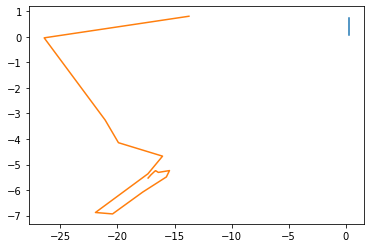

In [41]:
x_true = []
x_pred = []
y_true = []
y_pred = []

for frame in range(len(y_predicted[0])):
    x_true.append(test_y[0][frame].numpy()[6])
    x_pred.append(y_predicted[0][frame].numpy()[6])
    y_true.append(test_y[0][frame].numpy()[7])
    y_pred.append(y_predicted[0][frame].numpy()[7])
    
plt.plot(x_true, y_true, label='true')
plt.plot(x_pred, y_pred, label='pred')

In [44]:
y_true

[0.73481894,
 0.38454574,
 0.10056846,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496,
 0.07054496]